# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️  High variance는 모델이 학습 데이터에 과적합된 상태를 의미한다. 이는 모델이 학습 데이터의 세부적인 노이즈까지 학습하여 새로운 데이터에 대해 일반화 능력이 떨어지게 되는 문제를 발생시킨다. 결과적으로 학습 데이터에서는 높은 성능을 보이지만, 테스트 데이터나 실제 데이터에서는 성능이 저하되는 문제가 발생한다. High variance 문제는 모델의 복잡도가 지나치게 높을 때 주로 발생하며, 모델의 불안정성을 초래할 수 있다.

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ High bias는 모델이 학습 데이터의 중요한 패턴을 제대로 학습하지 못하고, 단순한 패턴만을 학습하는 상태를 의미한다. 이는 모델이 학습 데이터에 대해 과소적합된 상태를 나타낸다. High bias 문제는 모델이 지나치게 단순하거나, 중요한 변수들을 제대로 반영하지 못하는 경우 발생한다. 이로 인해 학습 데이터와 테스트 데이터 모두에서 성능이 낮아지며, 모델의 예측력이 저하된다.

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️ High variance 문제를 해결하기 위해 적합한 앙상블 방법은 Bagging이다. Bagging은 여러 개의 학습 데이터 샘플을 랜덤하게 생성한 후, 각각의 샘플에 대해 독립적인 모델을 학습시킨 후 이 모델들의 결과를 평균내거나 투표를 통해 최종 예측값을 도출한다. 이를 통해 모델의 분산을 줄이고, 과적합을 방지할 수 있다. 대표적인 예로 랜덤 포레스트가 있다.


- High bias problem : 🐻‍❄️ High bias 문제를 해결하기 위해 적합한 앙상블 방법은 Boosting이다. Boosting은 여러 개의 모델을 순차적으로 학습시키며, 이전 모델이 잘못 예측한 데이터에 대해 가중치를 높여 다음 모델이 더 잘 학습할 수 있도록 한다. 이를 통해 모델의 복잡성을 높이고, 점진적으로 학습 성능을 개선하여 과소적합 문제를 해결할 수 있다. 대표적인 예로 그래디언트 부스팅이 있다.

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('/content/drive/MyDrive/tobigs/3주차/BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [3]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


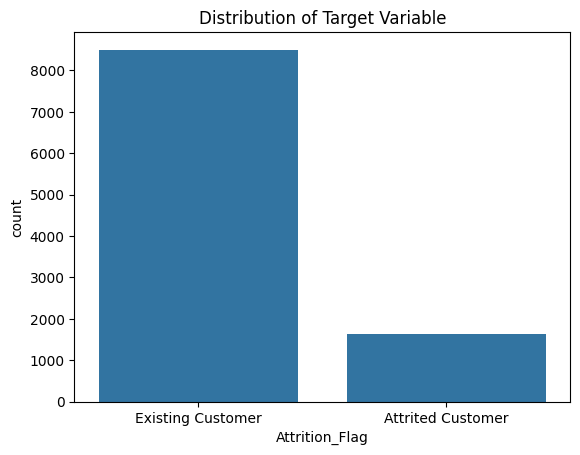

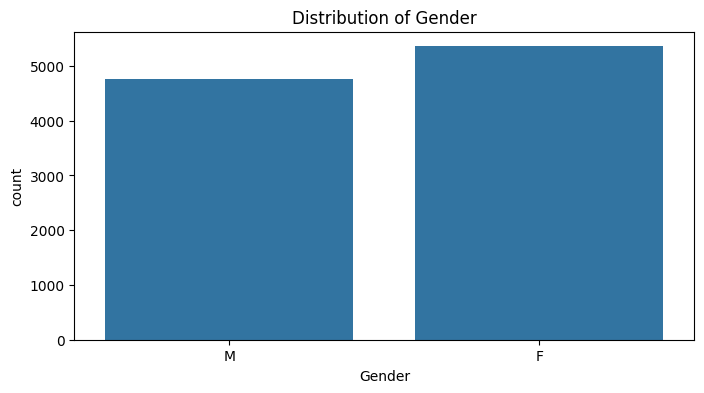

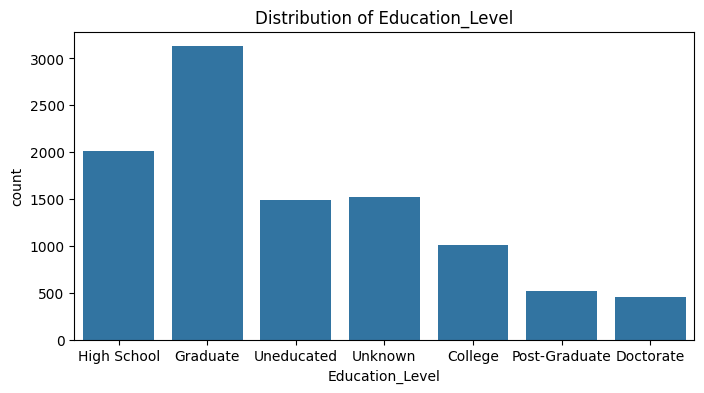

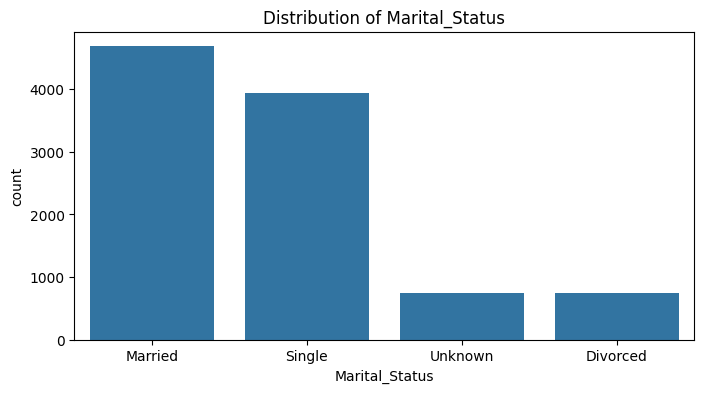

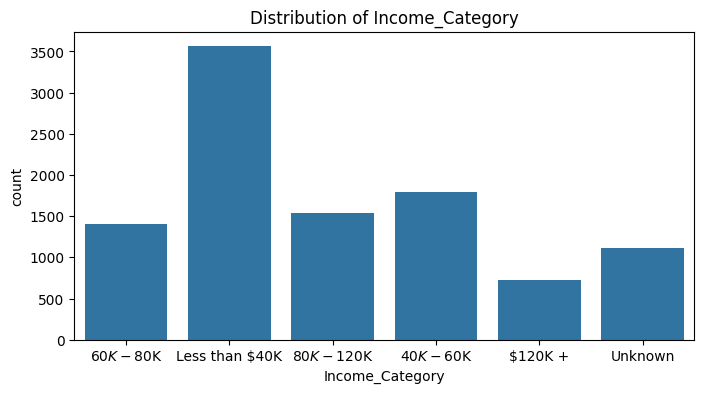

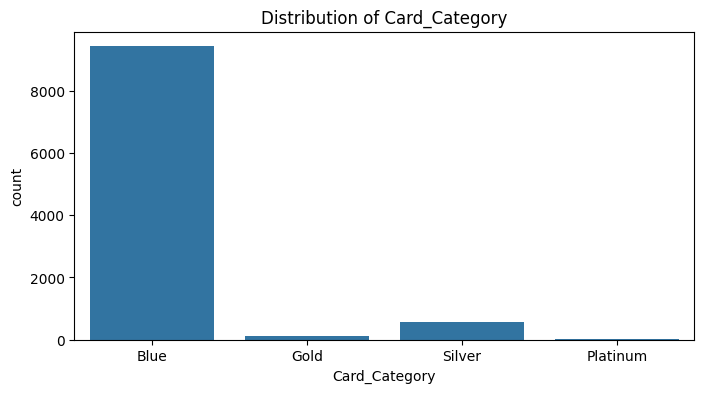

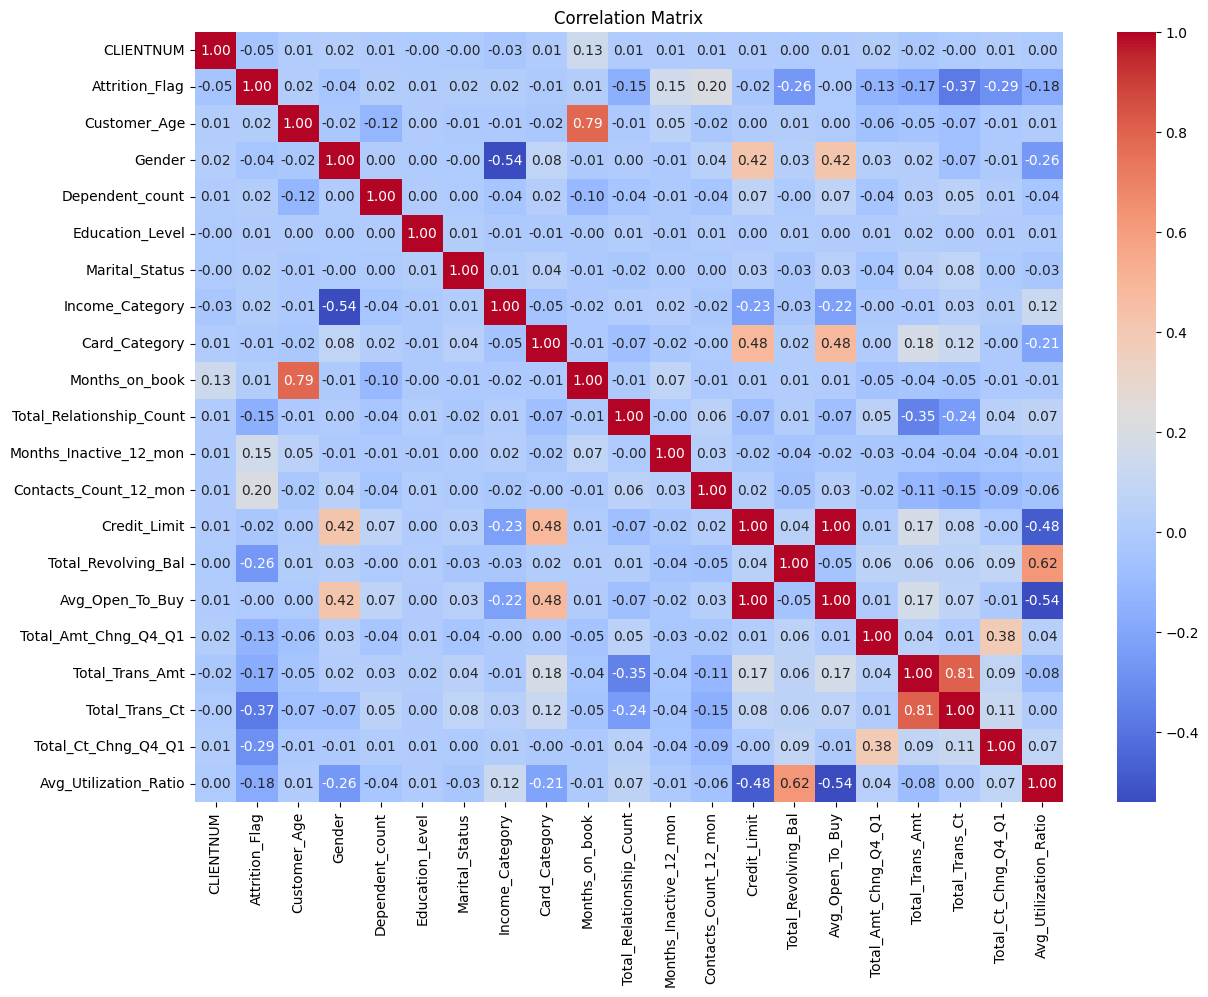

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# 결측치 확인
print(df.isnull().sum())

# 타겟 변수 분포 확인
sns.countplot(data=df, x='Attrition_Flag')
plt.title('Distribution of Target Variable')
plt.show()

# 수치형 변수에 대한 기본 통계 확인
df.describe()

# 범주형 변수의 분포 확인
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

# 범주형 변수 인코딩 (Label Encoding)
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 타겟 변수 인코딩
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# 상관관계 행렬 (Correlation Matrix) 확인
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [7]:
# 특성(X)과 타겟(y) 분리
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# 학습 데이터와 테스트 데이터 분리 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 스케일링 (Standard Scaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# 3. AdaBoost
ab_model = AdaBoostClassifier(random_state=42)
ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test)
print("AdaBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_ab))
print(classification_report(y_test, y_pred_ab))
print(confusion_matrix(y_test, y_pred_ab))

# 4. Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


Decision Tree Performance:
Accuracy: 0.9407699901283317
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1701
           1       0.83      0.79      0.81       325

    accuracy                           0.94      2026
   macro avg       0.90      0.88      0.89      2026
weighted avg       0.94      0.94      0.94      2026

[[1648   53]
 [  67  258]]
Random Forest Performance:
Accuracy: 0.9590325765054294
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1701
           1       0.94      0.80      0.86       325

    accuracy                           0.96      2026
   macro avg       0.95      0.89      0.92      2026
weighted avg       0.96      0.96      0.96      2026

[[1683   18]
 [  65  260]]
AdaBoost Performance:
Accuracy: 0.9536031589338598
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1701
           1       0

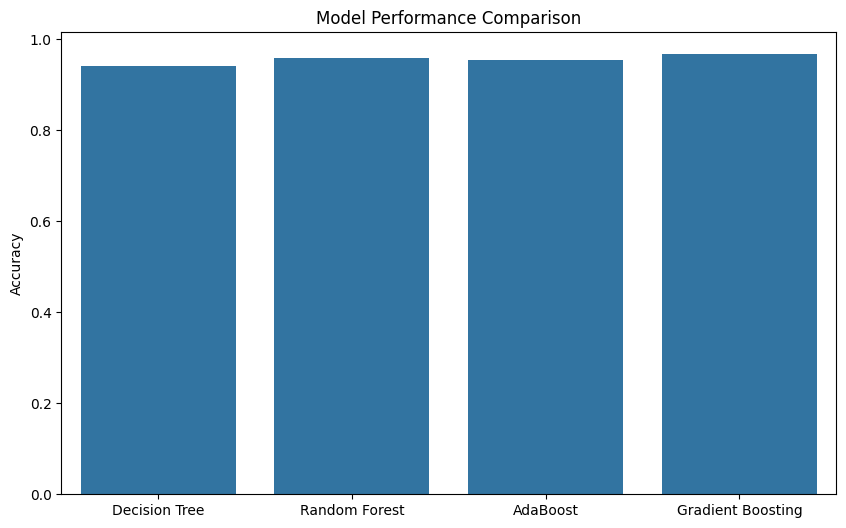

In [9]:
# 모델별 정확도 비교
model_names = ['Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_ab),
    accuracy_score(y_test, y_pred_gb)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies)
plt.title('Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()